In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [16]:
df = pd.read_csv('data/stud.csv')

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
X = df.drop('math_score', axis=1)

In [19]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [20]:
y = df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [21]:
num_feature = X.select_dtypes(exclude='object').columns
cat_feature = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_encoder = StandardScaler()
onhotencoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(), cat_feature),
        ('sc', StandardScaler(), num_feature)
    ]    
)




In [22]:
X = preprocessor.fit_transform(X)


In [23]:
X.shape

(1000, 19)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [27]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    score = r2_score(true, predicted)

    return mae, mse, rmse, score        

In [29]:
models = {
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'Random Forest':RandomForestRegressor(),
    'AdaBoost':AdaBoostRegressor(),
    'XGBoost':XGBRegressor(),
    'CatBoost':CatBoostRegressor(verbose=False),
    'K-Neighbors Regressor':KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor()
}

model_list = []
r2score = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    mae_train, mse_train, rmse_train, score_train = evaluate_model(y_train, y_pred_train)
    mae_test, mse_test, rmse_test, score_test = evaluate_model(y_test, y_pred_test)
    
    model_list.append(list(models.keys())[i])
    r2score.append(score_test)
    print(list(models.keys())[i])
    print("Model Performance for Train Data->")
    print('Mean Absolute Error: ', mae_train)
    print('Mean Squared Error: ', mse_train)
    print('Root Mean Squared Error: ', rmse_train)
    print('R2 Score: ', score_train)
    print('------------------------------------')
    print('Model Performance for Test Data->')
    print('Mean Absolute Error: ', mae_test)
    print('Mean Squared Error: ', mse_test)
    print('Root Mean Squared Error: ', rmse_test)
    print('R2 Score: ', score_test)
    print('='*35)
    print('\n')

LinearRegression
Model Performance for Train Data->
Mean Absolute Error:  4.272265625
Mean Squared Error:  28.5175634765625
Root Mean Squared Error:  5.340183842955456
R2 Score:  0.8735068463594741
------------------------------------
Model Performance for Test Data->
Mean Absolute Error:  4.2253125
Mean Squared Error:  29.39126953125
Root Mean Squared Error:  5.421371554436202
R2 Score:  0.8792164757750934


Ridge
Model Performance for Train Data->
Mean Absolute Error:  4.26498782372598
Mean Squared Error:  28.337788233082442
Root Mean Squared Error:  5.323324922741654
R2 Score:  0.8743042615212909
------------------------------------
Model Performance for Test Data->
Mean Absolute Error:  4.211100688014259
Mean Squared Error:  29.056272192348274
Root Mean Squared Error:  5.3903870169356365
R2 Score:  0.8805931485028738


Lasso
Model Performance for Train Data->
Mean Absolute Error:  5.206302661246526
Mean Squared Error:  43.47840400585579
Root Mean Squared Error:  6.593815587795566
R

In [31]:
pd.DataFrame(list(zip(model_list, r2score)), columns=['Model Name', 'R2 Score']).sort_values(by=['R2 Score'], ascending=False)

,Model Name,R2 Score
1,Ridge,0.880593
0,LinearRegression,0.879216
3,Random Forest,0.851836
6,CatBoost,0.851632
4,AdaBoost,0.846524
5,XGBoost,0.827797
2,Lasso,0.825320
7,K-Neighbors Regressor,0.783813
8,Decision Tree,0.765717


In [32]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
r2_score = r2_score(y_test, y_pred)*100
print('R2 Score of linear model is %.2f' %r2_score)

R2 Score of linear model is 87.92


Text(0, 0.5, 'Predicted Value')

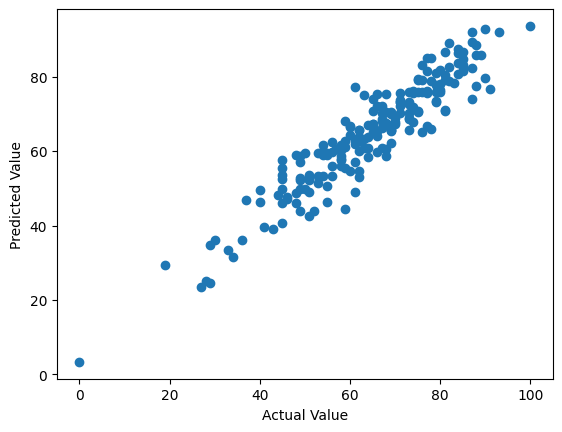

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

<Axes: xlabel='math_score'>

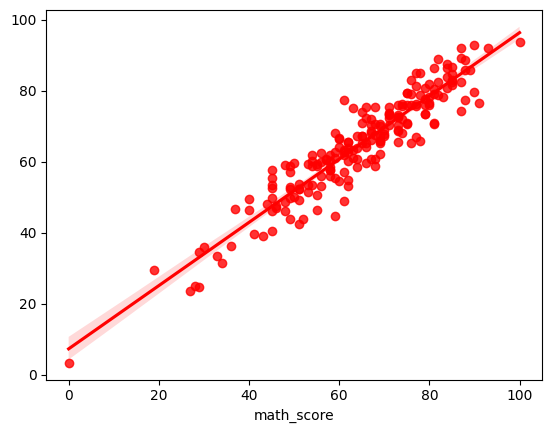

In [36]:
sns.regplot(x=y_test, y=y_pred, color='red')

In [37]:
pd.DataFrame({'Actual Value':y_test, 'Predicted value':y_pred, 'Difference':y_test-y_pred})

,Actual Value,Predicted value,Difference
521,91,76.6250,14.3750
737,53,59.3750,-6.3750
740,80,76.5000,3.5000
660,74,76.2500,-2.2500
411,84,87.4375,-3.4375
...,...,...,...
408,52,43.8750,8.1250
332,62,62.6250,-0.6250
208,74,67.9375,6.0625
613,65,67.2500,-2.2500
